In [1]:
%matplotlib inline

In [2]:
import pylab

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get specific functions from some other python libraries
from math import floor, log
from scipy.stats import skew, kurtosis
from scipy.io import loadmat  
import scipy.fftpack
from tqdm import tqdm
import os
import re
import seaborn as sns

In [4]:
sample_inter = loadmat('Pat1Train/Pat1Train_100_0.mat')

In [ ]:
# fig = plt.figure(figsize=(100,100))
# for i in range(16):
#     num = int(i+1)
#     ax = fig.add_subplot(16,1,num)
#     ax.plot(sample_inter['data'][:,i])

In [ ]:
# #lets plot my brain wave
# np.random.seed(1)
# fig = plt.figure()
# ax_inter = fig.add_subplot(121)
# fft_inter = scipy.fftpack.fft(sample_inter['data'][:,0])
# fft_inter = [abs(elem) for elem in fft_inter][0:120000]
# fft_inter = np.expand_dims(fft_inter, axis = -1)
# fft_inter = fft_inter/(max(fft_inter))
# ax_inter.set_title("Interictal")
# ax_inter.plot(fft_inter) # for some reason this is symmetric.
# ########
# ax_pre = fig.add_subplot(122)
# fft_pre = scipy.fftpack.fft(sample_pre['data'][:,0])
# fft_pre = [abs(elem) for elem in fft_pre][0:120000]
# fft_pre = np.expand_dims(fft_pre, axis = -1)
# fft_pre = fft_pre/(max(fft_pre))
# ax_pre.set_title("Preictal")
# ax_pre.plot(fft_pre) # for some reason this is symmetric.
# plt.show()

In [ ]:
# #lets plot my brain wave
# np.random.seed(1)
# fig = plt.figure()
# ax_inter = fig.add_subplot(121)
# fft_inter = scipy.fftpack.fft(sample_inter['data'][:,0][0:])
# fft_inter = [abs(elem) for elem in fft_inter][0:1600]
# fft_inter = np.expand_dims(fft_inter, axis = -1)
# fft_inter = fft_inter/(max(fft_inter))
# ax_inter.set_title("Interictal")
# ax_inter.plot(fft_inter) # for some reason this is symmetric.
# ########
# # ax_pre = fig.add_subplot(122)
# # fft_pre = scipy.fftpack.fft(sample_pre['data'][:,0])
# # fft_pre = [abs(elem) for elem in fft_pre][0:200]
# # fft_pre = np.expand_dims(fft_pre, axis = -1)
# # fft_pre = fft_pre/(max(fft_pre))
# # ax_pre.set_title("Preictal")
# # ax_pre.plot(fft_pre) # for some reason this is symmetric.
# plt.show()

In [5]:
#Frequency of interests
def defineEEGFreqs():
    
    '''
    EEG waveforms are divided into frequency groups. These groups seem to be related to mental activity.
    alpha waves = 8-13 Hz = Awake with eyes closed
    beta waves = 14-30 Hz = Awake and thinking, interacting, doing calculations, etc.
    gamma waves = 30-45 Hz = Might be related to conciousness and/or perception (particular 40 Hz)
    theta waves = 4-7 Hz = Light sleep
    delta waves < 3.5 Hz = Deep sleep

    There are other EEG features like sleep spindles and K-complexes, but I think for this analysis
    we are just looking to characterize the waveform based on these basic intervals.
    '''
    return (np.array([0.1, 4, 8, 14, 30, 45, 70, 180]))  # Frequency levels in Hz

In [ ]:
fig = plt.figure(figsize=(100,100))
for i in range(1):
    num = int(i+1)
    ax = fig.add_subplot(2,1,num)
    ax.plot(lets_see[:,i])
plt.show()

In [ ]:
x = np.arange(0,10*3.1416,0.01)

In [77]:
train_list = os.listdir('Pat1Train/')
train_list = train_list[1:]

In [100]:
train_df = pd.DataFrame()

In [110]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,segment_no_1009,-1.25461,-0.281967,-0.310729,0.544186,-0.406623,-0.904058,-1.19506,-0.21491,-0.276472,...,-0.617124,0.292642,-0.658621,0.0107496,-0.720855,-0.807141,1.87671,-0.485892,-0.706076,0
1,segment_no_100,0.037221,-0.798619,1.93119,-0.770041,-0.219491,-0.964409,-1.0617,-0.354528,-0.301604,...,-0.724561,-0.238021,0.286177,0.510529,-1.16483,0.598655,-0.919905,-1.2079,0.999249,0
2,segment_no_100,-0.946206,0.689066,1.65723,-0.409438,-1.10282,-0.661708,-1.0488,0.138899,-0.9787,...,-0.548337,-0.26159,0.238465,-0.121389,-0.877214,-0.301483,-0.799682,-0.868651,-0.92398,1
3,segment_no_1010,-1.61191,2.72964,0.0888485,-0.216459,-0.602633,-0.42354,-0.921809,-0.49062,-0.375947,...,-0.669568,0.759036,-0.28852,0.324491,-0.750485,-0.882012,1.70575,-0.736904,-0.85581,0
4,segment_no_1011,-0.931172,-0.734627,0.554728,1.93119,-1.25841,0.620876,-1.18047,-0.648253,-0.231221,...,-0.874606,0.184411,-0.251148,0.15106,-0.909935,-1.01275,1.37661,-0.552002,-0.737027,0


In [101]:
def get_amps(fft):
    gamma = np.mean(fft[:, 0:3], axis = 1)
    gamma = (gamma - np.mean(gamma))/np.std(gamma)
    theta = np.mean(fft[:, 4:7], axis = 1)
    theta = (theta - np.mean(theta))/np.std(theta)
    alpha = np.mean(fft[:,8:13], axis = 1)
    alpha = (alpha - np.mean(alpha))/np.std(alpha)
    beta = np.mean(fft[:,14:30] , axis = 1)
    beta = (beta - np.mean(beta))/np.std(beta)
    return list(gamma), list(theta), list(alpha), list(beta)  

In [102]:
#Create FFT features for whole signal and extract apmplitudes of alpha, beta gamma delta. Average FFT in that range.
for i in tqdm(train_list):
    reg1 = r'.*?\_(.*)\..*'
    match = re.search(reg1, i)
    text = match.group(1)
    segment = text.split('_')[0]
    label = text.split('_')[1]
    temp = loadmat('Pat1Train/' + i)['data']
    fft = abs(np.fft.fft(temp, axis = 0))
    fft = fft.T
    gamma, theta, alpha, beta = get_amps(fft)
    gamma.extend(theta)
    gamma.extend(alpha)
    gamma.extend(beta)
    temp = ['segment_no_' + segment] + gamma + [label]
    train_df = train_df.append(pd.DataFrame(temp).T)

 10%|█         | 86/826 [00:21<03:07,  3.95it/s]/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
100%|██████████| 826/826 [03:19<00:00,  4.14it/s]


In [103]:
train_df.reset_index(inplace = True)
train_df.drop('index', axis = 1, inplace=True)

In [120]:
train_df_empty_dropped = train_df.loc[np.sum(pd.isnull(train_df), axis = 1) != 64, :]

In [131]:
d = {}
for i in range(66):
    if i == 0:
        d[i] = 'segment_number'
    elif i > 0 and i < 65:
        if i < 17:
            d[i] = 'gamma_electrode_{}'.format(i)
        elif i >= 17 and i < 33:
            d[i] = 'theta_electrode_{}'.format(i-16)
        elif i >= 33 and i < 49:
            d[i] = 'alpha_electrode_{}'.format(i-32)
        elif i >= 49 and i < 65:
            d[i] = 'beta_electrode_{}'.format(i-48)
    elif i == 65:
        d[i] = 'Class'

In [133]:
train_df_empty_dropped = train_df_empty_dropped.rename(columns= d)

In [156]:
train_df_empty_dropped[train_df_empty_dropped.columns[-1]] = train_df_empty_dropped[train_df_empty_dropped.columns[-1]].astype(np.int64) 

In [149]:
for col in train_df_empty_dropped.columns[1:-1].values:
    train_df_empty_dropped[col] = train_df_empty_dropped[col].astype(np.float64)

In [159]:
train_df_empty_dropped.head()

,segment_number,gamma_electrode_1,gamma_electrode_2,gamma_electrode_3,gamma_electrode_4,gamma_electrode_5,gamma_electrode_6,gamma_electrode_7,gamma_electrode_8,gamma_electrode_9,...,beta_electrode_8,beta_electrode_9,beta_electrode_10,beta_electrode_11,beta_electrode_12,beta_electrode_13,beta_electrode_14,beta_electrode_15,beta_electrode_16,Class
0,segment_no_1009,-1.254605,-0.281967,-0.310729,0.544186,-0.406623,-0.904058,-1.195059,-0.214910,-0.276472,...,-0.617124,0.292642,-0.658621,0.010750,-0.720855,-0.807141,1.876707,-0.485892,-0.706076,0
1,segment_no_100,0.037221,-0.798619,1.931186,-0.770041,-0.219491,-0.964409,-1.061696,-0.354528,-0.301604,...,-0.724561,-0.238021,0.286177,0.510529,-1.164826,0.598655,-0.919905,-1.207896,0.999249,0
2,segment_no_100,-0.946206,0.689066,1.657231,-0.409438,-1.102820,-0.661708,-1.048797,0.138899,-0.978700,...,-0.548337,-0.261590,0.238465,-0.121389,-0.877214,-0.301483,-0.799682,-0.868651,-0.923980,1
3,segment_no_1010,-1.611912,2.729641,0.088848,-0.216459,-0.602633,-0.423540,-0.921809,-0.490620,-0.375947,...,-0.669568,0.759036,-0.288520,0.324491,-0.750485,-0.882012,1.705745,-0.736904,-0.855810,0
4,segment_no_1011,-0.931172,-0.734627,0.554728,1.931187,-1.258409,0.620876,-1.180467,-0.648253,-0.231221,...,-0.874606,0.184411,-0.251148,0.151060,-0.909935,-1.012747,1.376606,-0.552002,-0.737027,0


In [162]:
train_df_empty_dropped

,segment_number,gamma_electrode_1,gamma_electrode_2,gamma_electrode_3,gamma_electrode_4,gamma_electrode_5,gamma_electrode_6,gamma_electrode_7,gamma_electrode_8,gamma_electrode_9,...,beta_electrode_8,beta_electrode_9,beta_electrode_10,beta_electrode_11,beta_electrode_12,beta_electrode_13,beta_electrode_14,beta_electrode_15,beta_electrode_16,Class
0,segment_no_1009,-1.254605,-0.281967,-0.310729,0.544186,-0.406623,-0.904058,-1.195059,-0.214910,-0.276472,...,-0.617124,0.292642,-0.658621,0.010750,-0.720855,-0.807141,1.876707,-0.485892,-0.706076,0
1,segment_no_100,0.037221,-0.798619,1.931186,-0.770041,-0.219491,-0.964409,-1.061696,-0.354528,-0.301604,...,-0.724561,-0.238021,0.286177,0.510529,-1.164826,0.598655,-0.919905,-1.207896,0.999249,0
2,segment_no_100,-0.946206,0.689066,1.657231,-0.409438,-1.102820,-0.661708,-1.048797,0.138899,-0.978700,...,-0.548337,-0.261590,0.238465,-0.121389,-0.877214,-0.301483,-0.799682,-0.868651,-0.923980,1
3,segment_no_1010,-1.611912,2.729641,0.088848,-0.216459,-0.602633,-0.423540,-0.921809,-0.490620,-0.375947,...,-0.669568,0.759036,-0.288520,0.324491,-0.750485,-0.882012,1.705745,-0.736904,-0.855810,0
4,segment_no_1011,-0.931172,-0.734627,0.554728,1.931187,-1.258409,0.620876,-1.180467,-0.648253,-0.231221,...,-0.874606,0.184411,-0.251148,0.151060,-0.909935,-1.012747,1.376606,-0.552002,-0.737027,0
5,segment_no_1012,-1.333952,0.729139,0.102200,1.021012,-0.339711,-0.365973,-1.593735,-0.664316,2.283457,...,-0.515106,0.742686,-0.420176,-0.227018,-0.922180,-0.771087,1.478677,-0.839682,-1.012673,0
6,segment_no_1012,-0.903893,1.889267,-0.973815,-0.511098,-0.489602,0.184529,-0.890943,-0.195858,-0.769653,...,0.152000,0.929640,-0.547170,-0.452160,-0.512596,-0.093106,-0.444164,-0.642227,-0.563131,1
7,segment_no_1013,-1.737269,-0.620398,1.831790,1.762637,-0.969814,-0.847274,-0.873682,-0.282591,1.356186,...,-0.670010,2.201838,-0.750075,0.044817,-0.117320,-0.760086,-0.392447,-0.091156,-0.314565,0
8,segment_no_1014,-1.771750,-1.215625,1.165794,-0.495581,-0.812181,-0.876896,-0.980079,-0.004809,2.321525,...,0.011716,1.493217,-0.673784,-0.470531,-0.790175,-1.081348,0.392833,-0.532502,-0.701349,0
9,segment_no_101,-0.648022,-0.643397,-0.507837,0.128488,0.027270,-0.615203,3.478080,0.194796,-0.387149,...,-0.769613,-0.228639,0.170078,-0.033141,-1.099987,0.854133,-0.984875,-1.019354,-0.417393,0


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


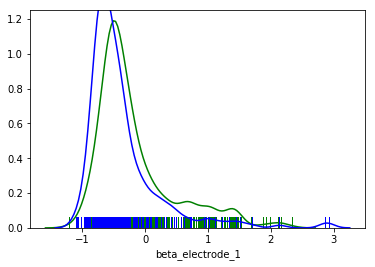

In [158]:
#Visualizing
sns.distplot(train_df_empty_dropped[train_df_empty_dropped['Class'] == 0]['beta_electrode_1'], color = 'green' , hist = False, rug = True)
sns.distplot(train_df_empty_dropped[train_df_empty_dropped['Class'] == 1]['beta_electrode_1'], color = 'blue',  hist = False, rug = True)
plt.show()

In [117]:
just_check = loadmat('Pat1Train/' +  'Pat1Train_98_0.mat')['data']

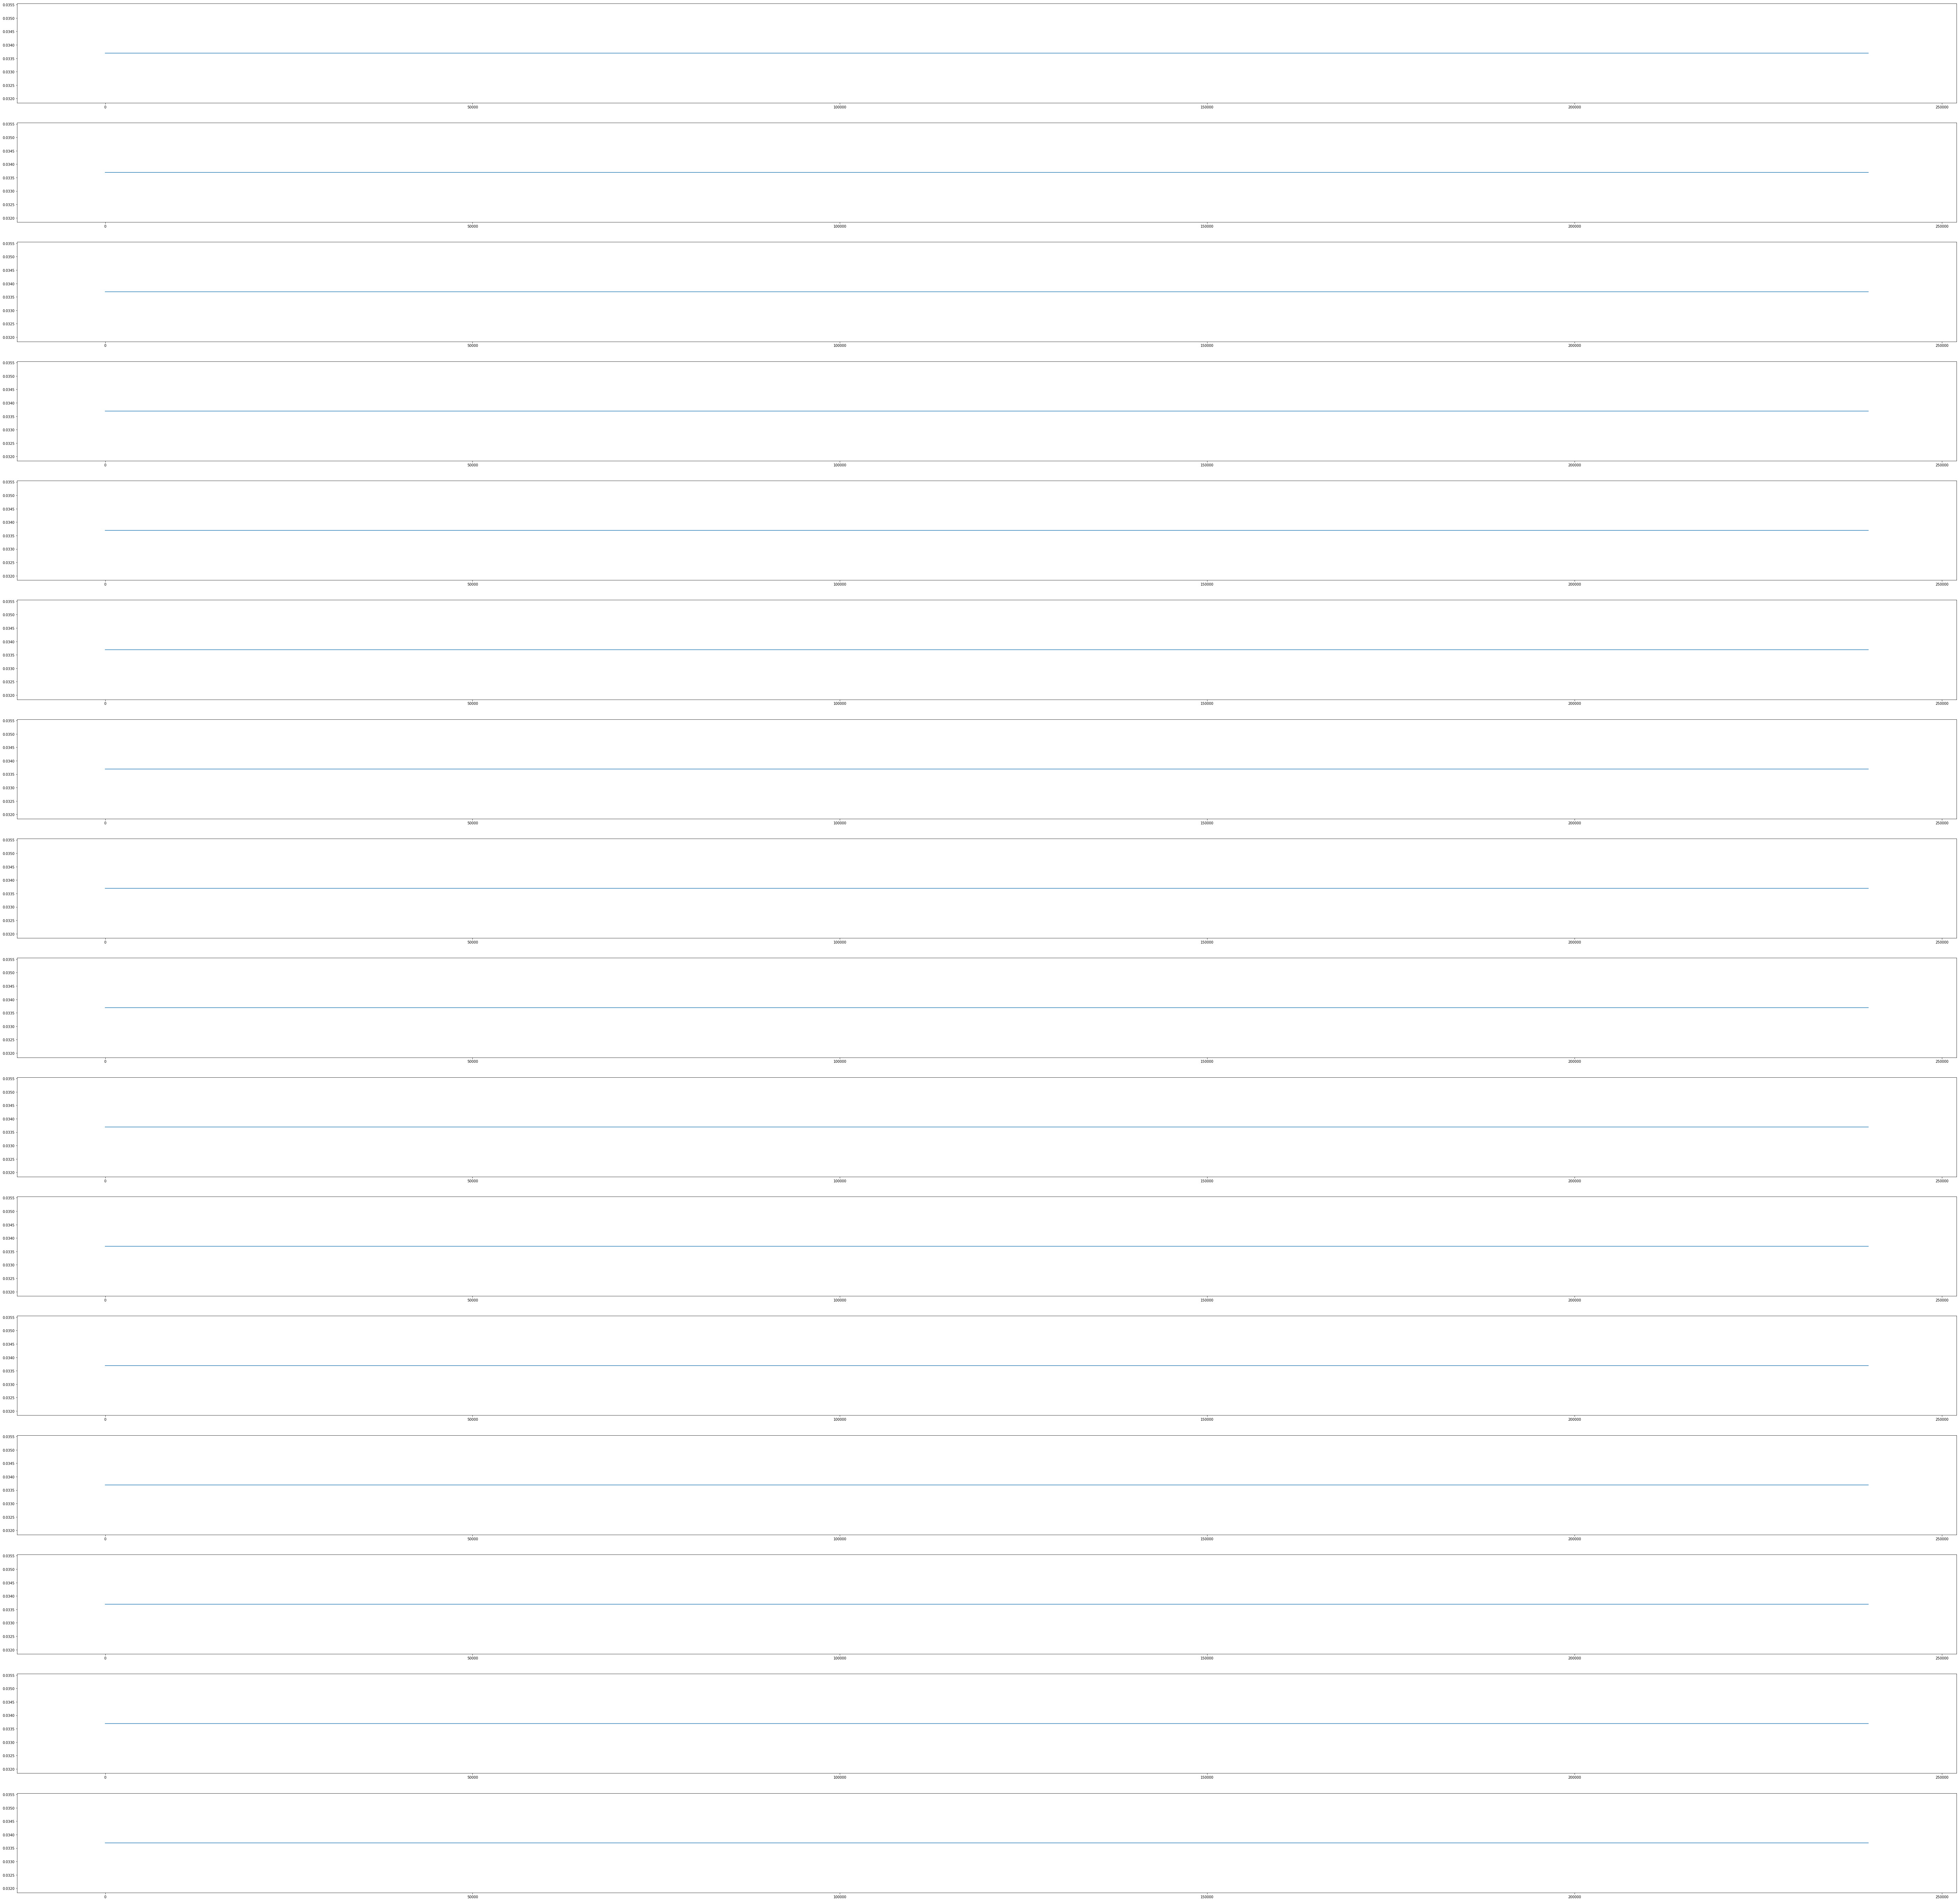

In [118]:
fig = plt.figure(figsize=(100,100))
for i in range(16):
    num = int(i+1)
    ax = fig.add_subplot(16,1,num)
    ax.plot(just_check[:,i])

In [109]:
np.unique(just_check)

array([0.03369141], dtype=float32)

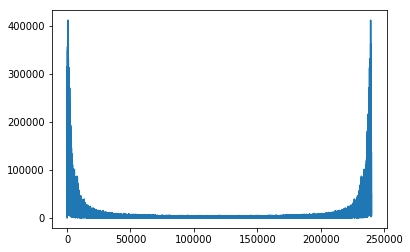

In [42]:
plt.plot(fft[:,0])

In [ ]:
temp = list(np.mean(temp, axis = 0))
temp = ['segment_no_' + segment] + temp + [label]
train_df = train_df.append(pd.DataFrame(temp).T)